<a href="https://colab.research.google.com/github/sumit1311singh/Stacking_Ensemble_Machine_Learning/blob/main/Stacking_Ensemble_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=1500, n_features=30, n_informative=20, n_redundant=5, random_state=1)

In [2]:
def new_models():
  models = dict()
  models['lr'] = LogisticRegression()
  models['knn'] = KNeighborsClassifier()
  models['cart'] = DecisionTreeClassifier()
  models['svm'] = SVC()
  models['bayes'] = GaussianNB()
  models['stacking'] = new_stacking()
  return models

In [3]:
def new_stacking():
  level0 = list()
  level0.append(('lr', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('cart', DecisionTreeClassifier()))
  level0.append(('svm', SVC()))
  level0.append(('bayes', GaussianNB()))
  level1 = LogisticRegression()
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model

In [4]:
def eval_model(model):
  cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=4, random_state=2)
  scr = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-2, error_score='raise')
  return scr

In [ ]:
X, Y = new_dataset()
models = new_models()
results, names = list(), list()
for name, model in models.items():
  scr = eval_model(model)
  results.append(scores)
  names.append(name)
  print('>%s %.4f (%.4f)' % (name, mean(scr), std(scr)))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

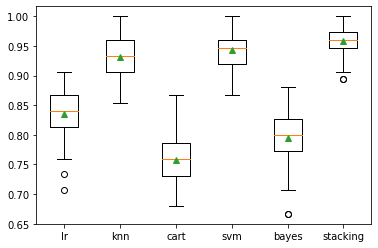

In [6]:
from sklearn.datasets import make_regression
X, Y = make_regression(n_samples=1500, n_features=30, n_informative=20, noise=0.1, random_state=1)

In [7]:
def new_models():
  models = dict()
  models['knn'] = KNeighborsRegressor()
  models['cart'] = DecisionTreeRegressor()
  models['svm'] = SVR()
  models['stacking'] = new_stacking()
  return models

In [8]:
def new_stacking():
  level0 = list()
  level0.append(('knn', KNeighborsRegressor()))
  level0.append(('cart', DecisionTreeRegressor()))
  level0.append(('svm', SVR()))
  level1 = LinearRegression()
  model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
  return model

In [9]:
def eval_model(model):
  cv = RepeatedKFold(n_splits=20, n_repeats=4, random_state=2)
  scr = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-2, error_score='raise')
  return scr

In [ ]:
X, Y = new_dataset()
models = new_models()
results, names = list(), list()
for name, model in models.items():
  scr = evaluate_model(model)
  results.append(scr)
  names.append(name)
  print('>%s %.4f (%.4f)' % (name, mean(scr), std(scr)))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

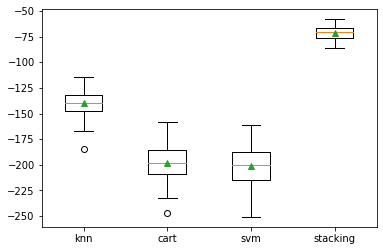